In [165]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score

# Visualizes all the columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [166]:
data = pd.read_csv('exoplanets_2018.csv')

In [167]:
data = data.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod[days',
'koi_period_err1':'OrbitalPeriodUpperUnc.[days',
'koi_period_err2':'OrbitalPeriodLowerUnc.[days',
'koi_time0bk':'TransitEpoch[BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc.[BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc.[BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration[hrs',
'koi_duration_err1':'TransitDurationUpperUnc.[hrs',
'koi_duration_err2':'TransitDurationLowerUnc.[hrs',
'koi_depth':'TransitDepth[ppm',
'koi_depth_err1':'TransitDepthUpperUnc.[ppm',
'koi_depth_err2':'TransitDepthLowerUnc.[ppm',
'koi_prad':'PlanetaryRadius[Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc.[Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc.[Earthradii',
'koi_teq':'EquilibriumTemperature[K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc.[K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc.[K',
'koi_insol':'InsolationFlux[Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc.[Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc.[Earthflux',
'koi_model_snr':'TransitSignal-to-Nois',
'koi_tce_plnt_num':'TCEPlanetNumbe',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature[K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc.[K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc.[K',
'koi_slogg':'StellarSurfaceGravity[log10(cm/s**2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc.[log10(cm/s**2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc.[log10(cm/s**2)',
'koi_srad':'StellarRadius[Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc.[Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc.[Solarradii',
'ra':'RA[decimaldegrees',
'dec':'Dec[decimaldegrees',
'koi_kepmag':'Kepler-band[mag]'
})
data.head()

,KepID,KOIName,KeplerName,ExoplanetArchiveDisposition,DispositionUsingKeplerData,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,EquilibriumTemperatureUpperUnc.[K,EquilibriumTemperatureLowerUnc.[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag]
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [168]:
data['ExoplanetCandidate'] = data['DispositionUsingKeplerData'].apply(lambda x: 1 if x == 'CANDIDATE' else 0)

In [169]:
data['ExoplanetConfirmed'] = data['ExoplanetArchiveDisposition'].apply(lambda x: 2 if x == 'CONFIRMED' else 1 if x == 'CANDIDATE' else 0 )

In [170]:
data=data.drop(['ExoplanetArchiveDisposition', 'DispositionUsingKeplerData'],axis=1)

In [171]:
data.head()

,KepID,KOIName,KeplerName,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,EquilibriumTemperatureUpperUnc.[K,EquilibriumTemperatureLowerUnc.[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,10797460,K00752.01,Kepler-227 b,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,10797460,K00752.02,Kepler-227 c,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,10811496,K00753.01,NaN,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,10848459,K00754.01,NaN,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,10854555,K00755.01,Kepler-664 b,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [172]:
data.drop(columns=['KeplerName','KOIName'], inplace=True)

In [173]:
data.head()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,EquilibriumTemperatureUpperUnc.[K,EquilibriumTemperatureLowerUnc.[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,10797460,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,10797460,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,10811496,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,10848459,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,10854555,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [174]:
data.TCEDeliver.unique()

array(['q1_q17_dr25_tce', 'q1_q16_tce', nan, 'q1_q17_dr24_tce'],
      dtype=object)

In [175]:
data.isna().sum()

KepID                                                       0
DispositionScore                                         1510
NotTransit-LikeFalsePositiveFlag                            0
koi_fpflag_ss                                               0
CentroidOffsetFalsePositiveFlag                             0
EphemerisMatchIndicatesContaminationFalsePositiveFlag       0
OrbitalPeriod[days                                          0
OrbitalPeriodUpperUnc.[days                               454
OrbitalPeriodLowerUnc.[days                               454
TransitEpoch[BKJD                                           0
TransitEpochUpperUnc.[BKJD                                454
TransitEpochLowerUnc.[BKJD                                454
ImpactParamete                                            363
ImpactParameterUpperUnc                                   454
ImpactParameterLowerUnc                                   454
TransitDuration[hrs                                         0
TransitD

In [176]:
data.shape

(9564, 47)

In [177]:
data=data.drop(['EquilibriumTemperatureUpperUnc.[K','EquilibriumTemperatureLowerUnc.[K'], axis=1)

In [178]:
data.head()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,10797460,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,10797460,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,10811496,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,10848459,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,10854555,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [179]:
data.shape

(9564, 45)

In [180]:
data.dropna(inplace=True)

In [181]:
data.head()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,10797460,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,10797460,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,10811496,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,10848459,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,10854555,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [182]:
data.isna().sum()

KepID                                                    0
DispositionScore                                         0
NotTransit-LikeFalsePositiveFlag                         0
koi_fpflag_ss                                            0
CentroidOffsetFalsePositiveFlag                          0
EphemerisMatchIndicatesContaminationFalsePositiveFlag    0
OrbitalPeriod[days                                       0
OrbitalPeriodUpperUnc.[days                              0
OrbitalPeriodLowerUnc.[days                              0
TransitEpoch[BKJD                                        0
TransitEpochUpperUnc.[BKJD                               0
TransitEpochLowerUnc.[BKJD                               0
ImpactParamete                                           0
ImpactParameterUpperUnc                                  0
ImpactParameterLowerUnc                                  0
TransitDuration[hrs                                      0
TransitDurationUpperUnc.[hrs                            

In [183]:
data.TCEDeliver.unique()

array(['q1_q17_dr25_tce'], dtype=object)

In [184]:
data.shape

(7803, 45)

In [185]:
data.TCEDeliver=1

In [186]:
data.head()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
0,10797460,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,1,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
1,10797460,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,1,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1,2
2,10811496,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,1,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1,1
3,10848459,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,1,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0
4,10854555,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,1,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1,2


In [187]:
corelation = data.corr()

<Axes: >

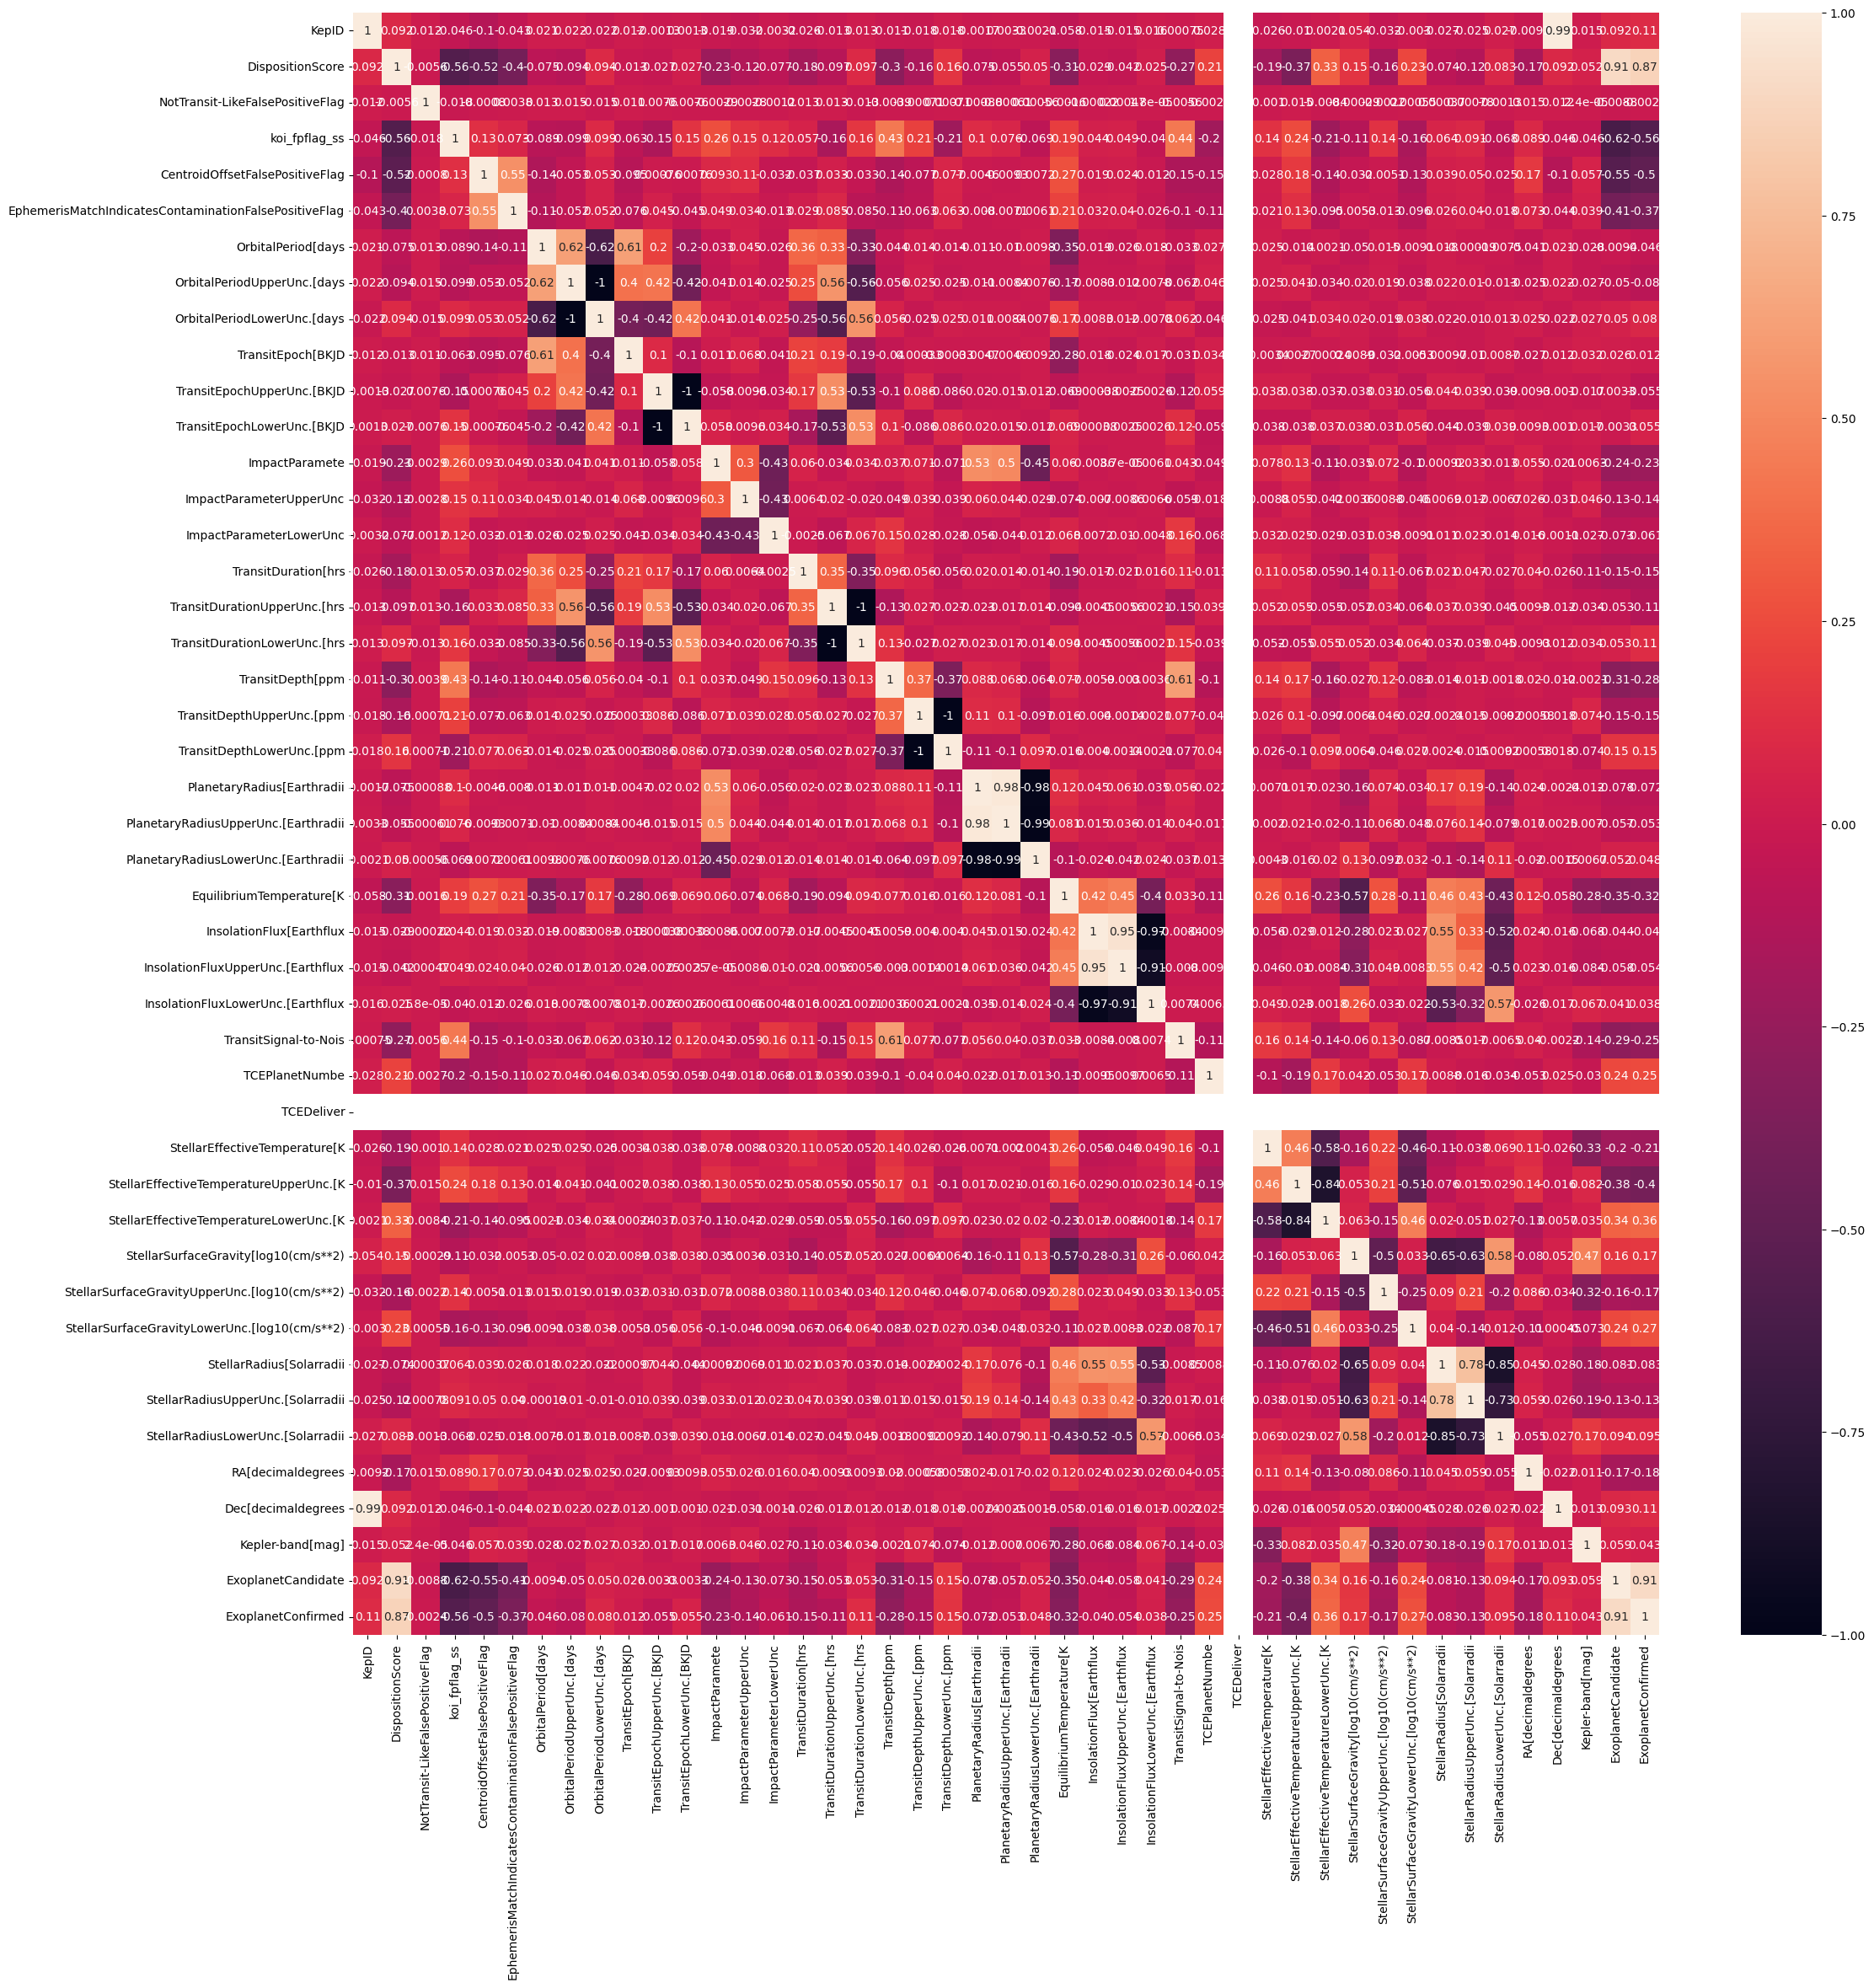

In [188]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,ax=ax)

In [46]:
# data.drop(columns=['KeplerName','KOIName','EquilibriumTemperatureUpperUnc.[K',
#                 'KepID','ExoplanetArchiveDisposition','DispositionUsingKeplerData',
 #                'NotTransit-LikeFalsePositiveFlag','koi_fpflag_ss','CentroidOffsetFalsePositiveFlag',
 #                'EphemerisMatchIndicatesContaminationFalsePositiveFlag','TCEDeliver',
#                 'EquilibriumTemperatureLowerUnc.[K'], inplace=True)

In [ ]:
# numeric_columns = [col for col in data.columns if col != 'ExoplanetCandidate']

# Loop through each numeric column and create individual swarm plots
# for col in numeric_columns:
#    plt.figure(figsize=(8, 6))
#    sns.swarmplot(x='ExoplanetCandidate', y=col, data=data)
#    plt.xlabel('ExoplanetCandidate', fontsize=12)
#    plt.ylabel(col, fontsize=12)
#    plt.title(f'{col} vs. ExoplanetCandidate', fontsize=14)
#    plt.show()

In [189]:
data['ExoplanetCandidate'].unique()

array([1, 0])

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
train, test = train_test_split(data, test_size=0.4, random_state=1)

In [192]:
train.shape

(4681, 45)

In [193]:
test.shape

(3122, 45)

In [194]:
data.shape

(7803, 45)

In [195]:
train.to_csv('train2.csv',index=False)

In [196]:
test.head()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
441,5130369,0.0,0,1,1,1,19.978670,5.870000e-05,-5.870000e-05,137.170610,0.002400,-0.002400,0.923,0.006,-0.011,10.16800,0.17800,-0.17800,944.0,13.0,-13.0,6.85,2.90,-1.56,1351.0,788.02,997.18,-402.86,86.2,1.0,1,9651.0,272.0,-467.0,4.229,0.126,-0.234,1.895,0.803,-0.432,299.15353,40.286961,13.849,0,0
8525,5385667,0.0,1,0,1,1,12.426181,3.850000e-04,-3.850000e-04,141.530700,0.030700,-0.030700,0.980,0.106,-0.005,29.09000,2.00000,-2.00000,92.2,2.6,-2.6,1.88,0.51,-0.63,976.0,214.85,172.60,-130.41,39.0,1.0,1,5948.0,161.0,-178.0,4.106,0.350,-0.150,1.432,0.391,-0.478,297.64059,40.531952,13.219,0,0
1632,9838975,0.0,0,1,0,0,18.692861,1.750000e-06,-1.750000e-06,143.833183,0.000077,-0.000077,0.116,0.023,-0.078,3.88584,0.00636,-0.00636,51300.0,48.0,-48.0,14.81,2.00,-0.92,528.0,18.40,8.27,-3.90,1281.9,1.0,1,5190.0,156.0,-140.0,4.660,0.028,-0.083,0.660,0.089,-0.041,295.03354,46.600151,16.147,0,0
2911,6636320,1.0,0,0,0,0,6.331252,3.800000e-05,-3.800000e-05,137.141490,0.004820,-0.004820,0.094,0.370,-0.094,2.68800,0.15000,-0.15000,307.0,21.8,-21.8,1.31,0.23,-0.10,822.0,108.04,59.23,-26.06,16.2,1.0,1,5383.0,159.0,-159.0,4.603,0.035,-0.112,0.759,0.132,-0.057,299.08099,42.018139,15.411,1,1
7087,11968514,0.0,0,1,1,1,1.036592,5.140000e-07,-5.140000e-07,132.089545,0.000434,-0.000434,1.250,1.190,-0.188,2.29600,0.02170,-0.02170,2120.0,16.4,-16.4,293.01,50.40,-75.60,4194.0,73013.77,32116.38,-35125.08,150.6,1.0,1,4884.0,58.0,-72.0,2.737,0.162,-0.108,8.747,1.504,-2.256,294.36172,50.307598,11.449,0,0


In [197]:
test_solution = test['ExoplanetCandidate']

In [198]:
test_solution

441     0
8525    0
1632    0
2911    1
7087    0
       ..
742     0
6524    0
4216    1
3928    0
9036    1
Name: ExoplanetCandidate, Length: 3122, dtype: int64

In [199]:
test=test.drop(['ExoplanetCandidate'],axis=1)

In [200]:
test.head()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetConfirmed
441,5130369,0.0,0,1,1,1,19.978670,5.870000e-05,-5.870000e-05,137.170610,0.002400,-0.002400,0.923,0.006,-0.011,10.16800,0.17800,-0.17800,944.0,13.0,-13.0,6.85,2.90,-1.56,1351.0,788.02,997.18,-402.86,86.2,1.0,1,9651.0,272.0,-467.0,4.229,0.126,-0.234,1.895,0.803,-0.432,299.15353,40.286961,13.849,0
8525,5385667,0.0,1,0,1,1,12.426181,3.850000e-04,-3.850000e-04,141.530700,0.030700,-0.030700,0.980,0.106,-0.005,29.09000,2.00000,-2.00000,92.2,2.6,-2.6,1.88,0.51,-0.63,976.0,214.85,172.60,-130.41,39.0,1.0,1,5948.0,161.0,-178.0,4.106,0.350,-0.150,1.432,0.391,-0.478,297.64059,40.531952,13.219,0
1632,9838975,0.0,0,1,0,0,18.692861,1.750000e-06,-1.750000e-06,143.833183,0.000077,-0.000077,0.116,0.023,-0.078,3.88584,0.00636,-0.00636,51300.0,48.0,-48.0,14.81,2.00,-0.92,528.0,18.40,8.27,-3.90,1281.9,1.0,1,5190.0,156.0,-140.0,4.660,0.028,-0.083,0.660,0.089,-0.041,295.03354,46.600151,16.147,0
2911,6636320,1.0,0,0,0,0,6.331252,3.800000e-05,-3.800000e-05,137.141490,0.004820,-0.004820,0.094,0.370,-0.094,2.68800,0.15000,-0.15000,307.0,21.8,-21.8,1.31,0.23,-0.10,822.0,108.04,59.23,-26.06,16.2,1.0,1,5383.0,159.0,-159.0,4.603,0.035,-0.112,0.759,0.132,-0.057,299.08099,42.018139,15.411,1
7087,11968514,0.0,0,1,1,1,1.036592,5.140000e-07,-5.140000e-07,132.089545,0.000434,-0.000434,1.250,1.190,-0.188,2.29600,0.02170,-0.02170,2120.0,16.4,-16.4,293.01,50.40,-75.60,4194.0,73013.77,32116.38,-35125.08,150.6,1.0,1,4884.0,58.0,-72.0,2.737,0.162,-0.108,8.747,1.504,-2.256,294.36172,50.307598,11.449,0


In [201]:
test_solution.to_csv('test_solution2.csv',index=False)

In [202]:
test.to_csv('test2.csv',index=False)

## Code

In [203]:
def evaluation(y_true, y_pred):
    
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_test, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_test, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_test, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_test, y_pred)))
    
# Print Confusion Matrix
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())
    
# Function Prints best parameters for GridSearchCV
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_)) 
    

In [204]:
train.head()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetCandidate,ExoplanetConfirmed
6206,5565261,0.000,0,1,1,0,2.362348,0.000003,-0.000003,131.705479,0.000896,-0.000896,1.219,1.461,-0.135,3.5979,0.0459,-0.0459,725.0,8.4,-8.4,89.55,32.30,-39.40,2104.0,4625.06,4905.48,-3328.28,103.6,1.0,1,5088.0,139.0,-139.0,3.502,0.462,-0.249,3.293,1.186,-1.450,299.33298,40.714352,13.990,0,0
7248,7100673,0.997,0,0,0,0,5.992733,0.000024,-0.000024,131.750790,0.003100,-0.003100,0.505,0.419,-0.302,2.6502,0.0944,-0.0944,69.8,3.9,-3.9,0.91,0.14,-0.13,1010.0,245.32,109.34,-76.88,19.2,3.0,1,5574.0,111.0,-100.0,4.354,0.132,-0.108,1.065,0.166,-0.150,285.72849,42.654530,12.639,1,2
3084,10387742,0.217,1,0,0,0,251.751200,0.002880,-0.002880,271.068640,0.006930,-0.006930,0.943,0.032,-0.671,4.3140,0.4360,-0.4360,114.0,18.6,-18.6,1.25,0.18,-0.08,272.0,1.29,0.52,-0.25,7.5,2.0,1,5640.0,101.0,-113.0,4.492,0.045,-0.113,0.921,0.131,-0.061,283.42911,47.592510,12.623,0,0
1748,3342794,0.997,0,0,0,0,14.172229,0.000056,-0.000056,142.601340,0.003200,-0.003200,0.869,0.048,-0.620,2.6297,0.0830,-0.0830,247.0,11.0,-11.0,2.39,0.38,-0.46,873.0,137.33,60.78,-55.22,24.5,1.0,1,5845.0,105.0,-117.0,4.200,0.176,-0.108,1.314,0.209,-0.256,291.60718,38.410389,13.776,1,2
1404,11253711,0.991,0,0,0,0,17.791087,0.000044,-0.000044,149.253440,0.001970,-0.001970,0.654,0.037,-0.495,2.6620,0.0593,-0.0593,414.0,11.3,-11.3,2.88,0.47,-0.64,830.0,112.09,48.40,-47.00,39.8,1.0,1,5855.0,79.0,-70.0,4.148,0.195,-0.105,1.340,0.221,-0.294,296.08975,48.955372,13.800,1,1


In [205]:
X = train.drop(['ExoplanetCandidate'],axis=1)

In [206]:
X.head()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetConfirmed
6206,5565261,0.000,0,1,1,0,2.362348,0.000003,-0.000003,131.705479,0.000896,-0.000896,1.219,1.461,-0.135,3.5979,0.0459,-0.0459,725.0,8.4,-8.4,89.55,32.30,-39.40,2104.0,4625.06,4905.48,-3328.28,103.6,1.0,1,5088.0,139.0,-139.0,3.502,0.462,-0.249,3.293,1.186,-1.450,299.33298,40.714352,13.990,0
7248,7100673,0.997,0,0,0,0,5.992733,0.000024,-0.000024,131.750790,0.003100,-0.003100,0.505,0.419,-0.302,2.6502,0.0944,-0.0944,69.8,3.9,-3.9,0.91,0.14,-0.13,1010.0,245.32,109.34,-76.88,19.2,3.0,1,5574.0,111.0,-100.0,4.354,0.132,-0.108,1.065,0.166,-0.150,285.72849,42.654530,12.639,2
3084,10387742,0.217,1,0,0,0,251.751200,0.002880,-0.002880,271.068640,0.006930,-0.006930,0.943,0.032,-0.671,4.3140,0.4360,-0.4360,114.0,18.6,-18.6,1.25,0.18,-0.08,272.0,1.29,0.52,-0.25,7.5,2.0,1,5640.0,101.0,-113.0,4.492,0.045,-0.113,0.921,0.131,-0.061,283.42911,47.592510,12.623,0
1748,3342794,0.997,0,0,0,0,14.172229,0.000056,-0.000056,142.601340,0.003200,-0.003200,0.869,0.048,-0.620,2.6297,0.0830,-0.0830,247.0,11.0,-11.0,2.39,0.38,-0.46,873.0,137.33,60.78,-55.22,24.5,1.0,1,5845.0,105.0,-117.0,4.200,0.176,-0.108,1.314,0.209,-0.256,291.60718,38.410389,13.776,2
1404,11253711,0.991,0,0,0,0,17.791087,0.000044,-0.000044,149.253440,0.001970,-0.001970,0.654,0.037,-0.495,2.6620,0.0593,-0.0593,414.0,11.3,-11.3,2.88,0.47,-0.64,830.0,112.09,48.40,-47.00,39.8,1.0,1,5855.0,79.0,-70.0,4.148,0.195,-0.105,1.340,0.221,-0.294,296.08975,48.955372,13.800,1


In [207]:
Y = train['ExoplanetCandidate']

In [208]:
Y

6206    0
7248    1
3084    0
1748    1
1404    1
       ..
959     0
5647    0
4245    0
240     1
5607    0
Name: ExoplanetCandidate, Length: 4681, dtype: int64

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1, test_size=.40)

In [210]:
X_train.head(2)

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,koi_fpflag_ss,CentroidOffsetFalsePositiveFlag,EphemerisMatchIndicatesContaminationFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetConfirmed
5039,3964545,0.000,0,1,0,0,3.012476,1.420000e-07,-1.420000e-07,132.246621,0.000042,-0.000042,0.708,0.247,-0.041,3.31903,0.00589,-0.00589,198000.0,143.0,-143.0,58.77,17.2,-11.50,1388.0,879.89,786.52,-386.88,2060.3,1.0,1,6015.0,190.0,-212.0,4.329,0.162,-0.180,1.088,0.319,-0.213,294.14001,39.089870,14.776,0
306,9388479,0.704,0,0,0,0,0.893041,4.610000e-07,-4.610000e-07,134.540342,0.000418,-0.000418,0.009,0.398,-0.009,1.09810,0.01590,-0.01590,742.0,10.2,-10.2,1.24,0.1,-0.15,893.0,151.14,42.14,-45.33,87.8,2.0,1,3582.0,71.0,-89.0,4.807,0.050,-0.045,0.458,0.040,-0.055,283.73203,45.958771,15.073,2


In [211]:
y_train.head()

5039    0
306     1
5666    0
121     1
325     0
Name: ExoplanetCandidate, dtype: int64

## Without dropping features

In [212]:
# Logistic Regression Model
lr = LogisticRegression()

# Fitting Model to the train set
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.7613454351308062
Recall: 0.9273285568065507
F1 Score: 0.8021248339973439
Precision: 0.7067082683307332

Confusion Matrix:
 TN,  FP, FN, TP
[520 376  71 906]


/home/ashwani/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [213]:
print(X_test.flags)


<Flags(allows_duplicate_labels=True)>


In [107]:
# was getting error: AttributeError: 'Flags' object has no attribute 'c_contiguous'
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)


In [214]:
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting Model to the train set
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [119]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Fitting Model to the train set
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.6865990389749066
Recall: 0.811284046692607
F1 Score: 0.7396895787139689
Precision: 0.6797066014669927

Confusion Matrix:
 TN,  FP, FN, TP
[452 393 194 834]


In [215]:
tree = DecisionTreeClassifier()

# Fitting Model to the train set
tree.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.99572877736252
Recall: 0.9948822927328557
F1 Score: 0.9959016393442622
Precision: 0.9969230769230769

Confusion Matrix:
 TN,  FP, FN, TP
[893   3   5 972]


In [216]:
# Instantiate model
forest = RandomForestClassifier(n_estimators=100, criterion='gini')
# Fitting Model to the train set
forest.fit(X_train, y_train)
# Predicting on the test set
y_pred = forest.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.99893219434063
Recall: 1.0
F1 Score: 0.9989775051124744
Precision: 0.9979570990806946

Confusion Matrix:
 TN,  FP, FN, TP
[894   2   0 977]


In [217]:
y_test

900     1
855     1
169     1
2068    1
4979    1
       ..
847     1
8521    0
5816    0
9274    0
2753    1
Name: ExoplanetCandidate, Length: 1873, dtype: int64

In [218]:
test=pd.read_csv('test2.csv')

In [219]:
pred = forest.predict(test)

In [220]:
pred[:20]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [221]:
test_solution[:20]

441     0
8525    0
1632    0
2911    1
7087    0
4411    1
7386    0
1373    1
2792    1
1800    1
7584    1
1324    1
7518    0
9457    0
40      0
2297    0
3840    1
7247    1
5838    1
5044    0
Name: ExoplanetCandidate, dtype: int64

In [222]:
test_sol = pd.read_csv('test_solution2.csv')

In [223]:
test_sol


,ExoplanetCandidate
0,0
1,0
2,0
3,1
4,0
...,...
3117,0
3118,0
3119,1
3120,0


In [226]:
def evaluation_test(y_true, y_pred):
    
# Print Accuracy, Recall, F1 Score, and Precision metrics.
    print('Evaluation Metrics:')
    print('Accuracy: ' + str(metrics.accuracy_score(y_true, y_pred)))
    print('Recall: ' + str(metrics.recall_score(y_true, y_pred)))
    print('F1 Score: ' + str(metrics.f1_score(y_true, y_pred)))
    print('Precision: ' + str(metrics.precision_score(y_true, y_pred)))
    
# Print Confusion Matrix
    print('\nConfusion Matrix:')
    print(' TN,  FP, FN, TP')
    print(confusion_matrix(y_true, y_pred).ravel())
    
# Function Prints best parameters for GridSearchCV
def print_results(results):
    print('Best Parameters: {}\n'.format(results.best_params_)) 
    

In [227]:
print(evaluation_test(test_sol,pred))

Evaluation Metrics:
Accuracy: 0.9990390775144138
Recall: 0.9993857493857494
F1 Score: 0.999078906969604
Precision: 0.9987722529158993

Confusion Matrix:
 TN,  FP, FN, TP
[1492    2    1 1627]
None


## Seeing the performance metrics, it doesn't seem the case of overfitting. That's a good thing about the model!

In [140]:
len(pred)

3122

In [141]:
len(test_solution)

3122

In [142]:
pred.shape

(3122,)

In [143]:
test_solution.shape

(3122,)

In [148]:
test_solution= test_solution.to_numpy()

In [149]:
test_solution

array([0, 0, 1, ..., 0, 1, 0])

In [147]:
pred


array([0, 0, 1, ..., 0, 1, 0])

# Here we can see Random forest clf gives best metrics score with an accuracy of: 99.786%

## Now with feature selection

In [111]:
corelation = data.corr()

<Axes: >

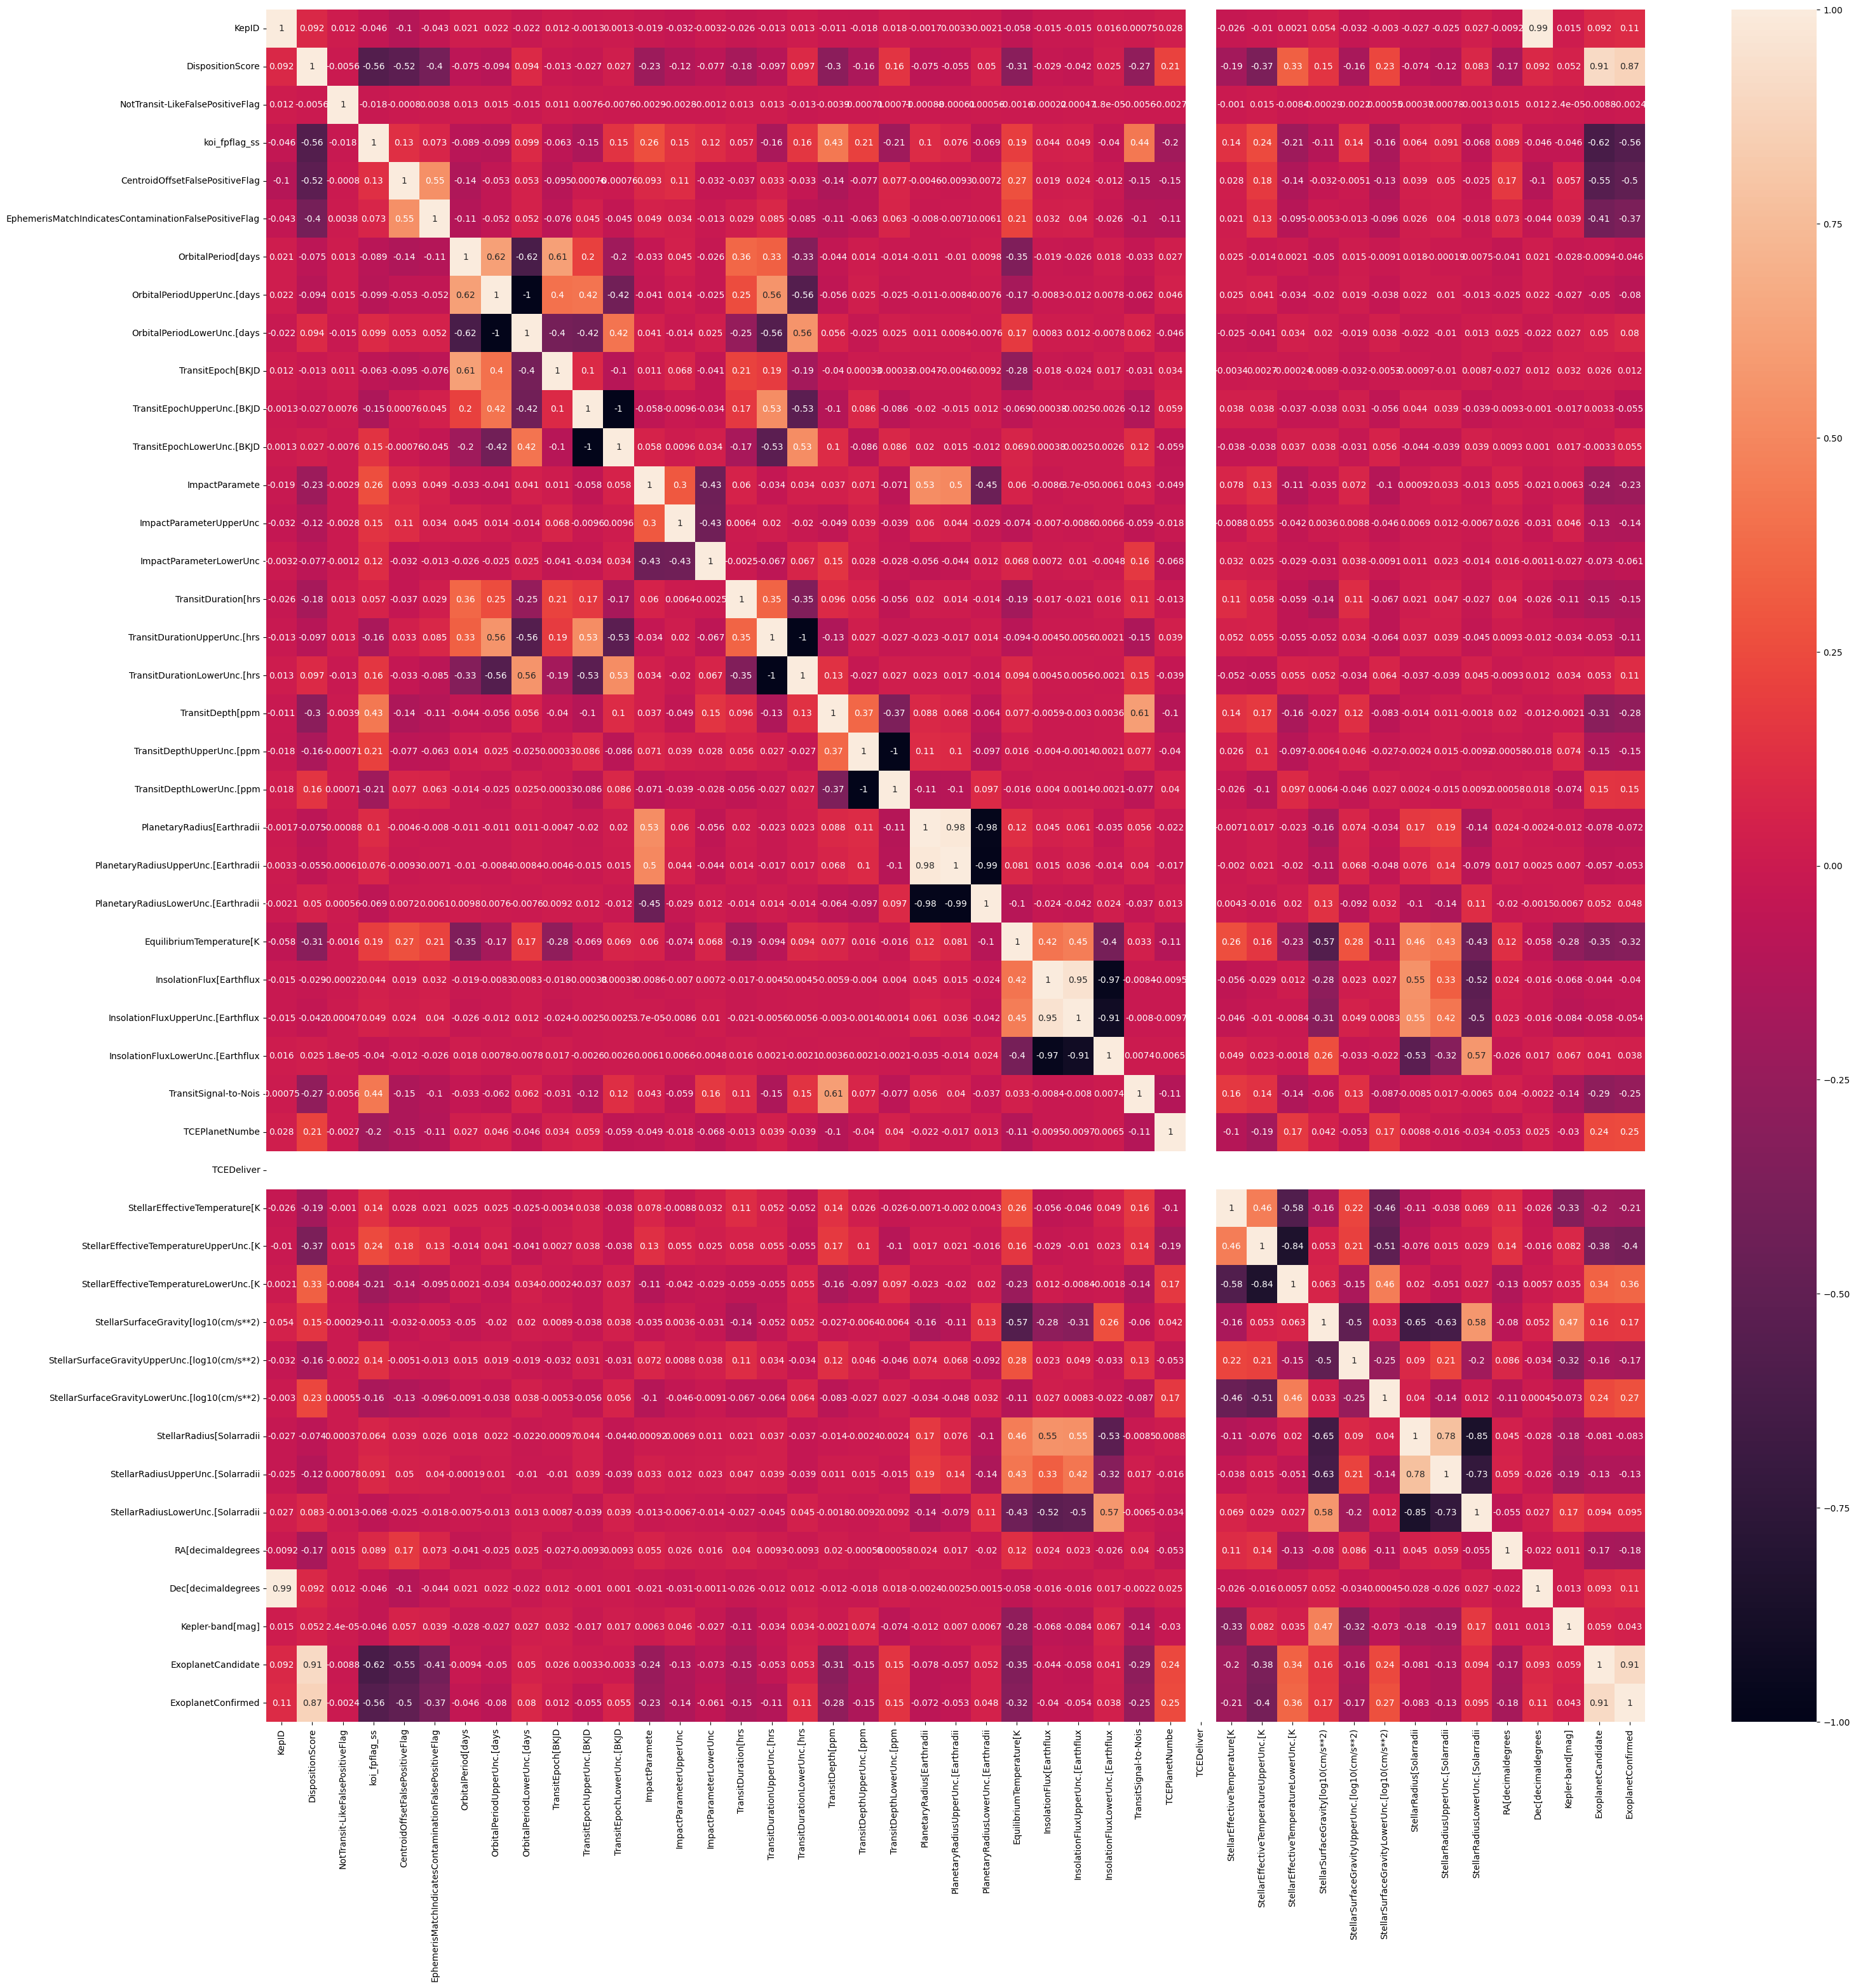

In [113]:
fig, ax = plt.subplots(figsize=(35,35))
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True,ax=ax)

In [114]:
data.columns

Index(['KepID', 'DispositionScore', 'NotTransit-LikeFalsePositiveFlag',
       'koi_fpflag_ss', 'CentroidOffsetFalsePositiveFlag',
       'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
       'OrbitalPeriod[days', 'OrbitalPeriodUpperUnc.[days',
       'OrbitalPeriodLowerUnc.[days', 'TransitEpoch[BKJD',
       'TransitEpochUpperUnc.[BKJD', 'TransitEpochLowerUnc.[BKJD',
       'ImpactParamete', 'ImpactParameterUpperUnc', 'ImpactParameterLowerUnc',
       'TransitDuration[hrs', 'TransitDurationUpperUnc.[hrs',
       'TransitDurationLowerUnc.[hrs', 'TransitDepth[ppm',
       'TransitDepthUpperUnc.[ppm', 'TransitDepthLowerUnc.[ppm',
       'PlanetaryRadius[Earthradii', 'PlanetaryRadiusUpperUnc.[Earthradii',
       'PlanetaryRadiusLowerUnc.[Earthradii', 'EquilibriumTemperature[K',
       'InsolationFlux[Earthflux', 'InsolationFluxUpperUnc.[Earthflux',
       'InsolationFluxLowerUnc.[Earthflux', 'TransitSignal-to-Nois',
       'TCEPlanetNumbe', 'TCEDeliver', 'StellarEffectiveTempera

In [229]:
data = data.drop(['koi_fpflag_ss', 'CentroidOffsetFalsePositiveFlag',
       'EphemerisMatchIndicatesContaminationFalsePositiveFlag',],axis=1)

In [230]:
X = data.drop(['ExoplanetCandidate'],axis=1)

In [231]:
X.head()

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetConfirmed
0,10797460,1.000,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,1,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,2
1,10797460,0.969,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,1,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,2
2,10811496,0.000,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,1,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1
3,10848459,0.000,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,1,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
4,10854555,1.000,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,1,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,2


In [232]:
Y = data['ExoplanetCandidate']

In [233]:
Y

0       1
1       1
2       1
3       0
4       1
       ..
9559    0
9560    1
9561    0
9562    1
9563    0
Name: ExoplanetCandidate, Length: 7803, dtype: int64

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=1, test_size=.40)

In [235]:
X_train.head(2)

,KepID,DispositionScore,NotTransit-LikeFalsePositiveFlag,OrbitalPeriod[days,OrbitalPeriodUpperUnc.[days,OrbitalPeriodLowerUnc.[days,TransitEpoch[BKJD,TransitEpochUpperUnc.[BKJD,TransitEpochLowerUnc.[BKJD,ImpactParamete,ImpactParameterUpperUnc,ImpactParameterLowerUnc,TransitDuration[hrs,TransitDurationUpperUnc.[hrs,TransitDurationLowerUnc.[hrs,TransitDepth[ppm,TransitDepthUpperUnc.[ppm,TransitDepthLowerUnc.[ppm,PlanetaryRadius[Earthradii,PlanetaryRadiusUpperUnc.[Earthradii,PlanetaryRadiusLowerUnc.[Earthradii,EquilibriumTemperature[K,InsolationFlux[Earthflux,InsolationFluxUpperUnc.[Earthflux,InsolationFluxLowerUnc.[Earthflux,TransitSignal-to-Nois,TCEPlanetNumbe,TCEDeliver,StellarEffectiveTemperature[K,StellarEffectiveTemperatureUpperUnc.[K,StellarEffectiveTemperatureLowerUnc.[K,StellarSurfaceGravity[log10(cm/s**2),StellarSurfaceGravityUpperUnc.[log10(cm/s**2),StellarSurfaceGravityLowerUnc.[log10(cm/s**2),StellarRadius[Solarradii,StellarRadiusUpperUnc.[Solarradii,StellarRadiusLowerUnc.[Solarradii,RA[decimaldegrees,Dec[decimaldegrees,Kepler-band[mag],ExoplanetConfirmed
6206,5565261,0.000,0,2.362348,0.000003,-0.000003,131.705479,0.000896,-0.000896,1.219,1.461,-0.135,3.5979,0.0459,-0.0459,725.0,8.4,-8.4,89.55,32.30,-39.40,2104.0,4625.06,4905.48,-3328.28,103.6,1.0,1,5088.0,139.0,-139.0,3.502,0.462,-0.249,3.293,1.186,-1.45,299.33298,40.714352,13.990,0
7248,7100673,0.997,0,5.992733,0.000024,-0.000024,131.750790,0.003100,-0.003100,0.505,0.419,-0.302,2.6502,0.0944,-0.0944,69.8,3.9,-3.9,0.91,0.14,-0.13,1010.0,245.32,109.34,-76.88,19.2,3.0,1,5574.0,111.0,-100.0,4.354,0.132,-0.108,1.065,0.166,-0.15,285.72849,42.654530,12.639,2


In [236]:
y_train.head()

6206    0
7248    1
3084    0
1748    1
1404    1
Name: ExoplanetCandidate, dtype: int64

In [237]:
# Logistic Regression Model
lr = LogisticRegression()

# Fitting Model to the train set
lr.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.75208199871877
Recall: 0.9281326781326781
F1 Score: 0.7961011591148577
Precision: 0.6969557195571956

Confusion Matrix:
 TN,  FP, FN, TP
[ 837  657  117 1511]


In [213]:
print(X_test.flags)


<Flags(allows_duplicate_labels=True)>


In [241]:
# was getting error: AttributeError: 'Flags' object has no attribute 'c_contiguous'
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)


In [242]:
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting Model to the train set
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.7117232543241512
Recall: 0.828009828009828
F1 Score: 0.7497219132369299
Precision: 0.6849593495934959

Confusion Matrix:
 TN,  FP, FN, TP
[ 874  620  280 1348]


In [243]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

# Fitting Model to the train set
knn.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.7235746316463805
Recall: 0.8335380835380836
F1 Score: 0.7587363712608332
Precision: 0.6962544894817855

Confusion Matrix:
 TN,  FP, FN, TP
[ 902  592  271 1357]


In [238]:
tree = DecisionTreeClassifier()

# Fitting Model to the train set
tree.fit(X_train, y_train)

# Predicting on the test set
y_pred = tree.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9983984625240231
Recall: 0.9981572481572482
F1 Score: 0.9984639016897082
Precision: 0.9987707437000615

Confusion Matrix:
 TN,  FP, FN, TP
[1492    2    3 1625]


In [239]:
# Instantiate model
forest = RandomForestClassifier(n_estimators=100, criterion='gini')
# Fitting Model to the train set
forest.fit(X_train, y_train)
# Predicting on the test set
y_pred = forest.predict(X_test)

# Evaluating model
evaluation(y_test, y_pred)

Evaluation Metrics:
Accuracy: 0.9990390775144138
Recall: 0.9993857493857494
F1 Score: 0.999078906969604
Precision: 0.9987722529158993

Confusion Matrix:
 TN,  FP, FN, TP
[1492    2    1 1627]


## After dropping negatively related features, Random ForestClassifier and Decision tree model is performing even more well!!